In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ezc3d import c3d

In [2]:
PATH_DATASETS = '../../Dataset/'
PATH_DATASET_1 = 'gait-dbase-1/'
PATH_DATASET_2 = 'gait-dbase-2/'

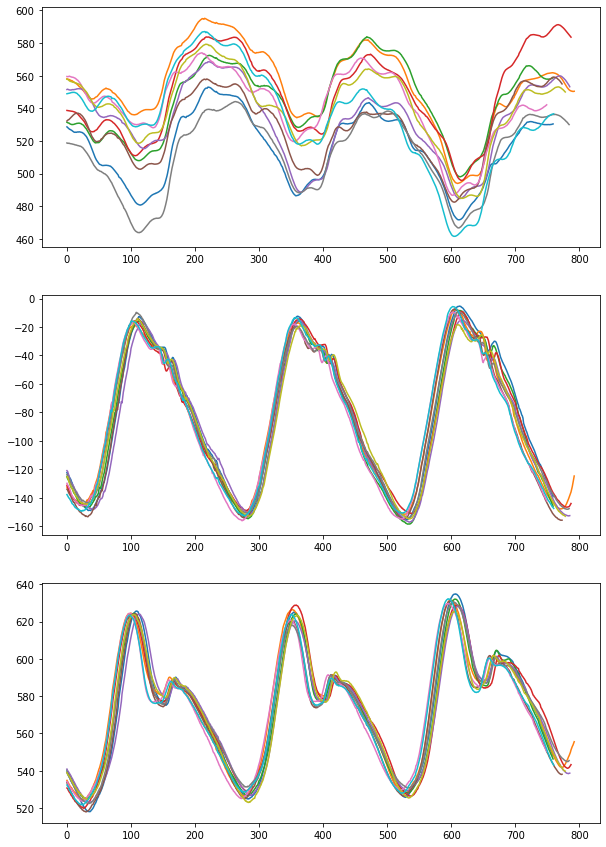

In [12]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:
        if not 'V35' in velocity:
            continue

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)
            lfm1x = content['data']['points'][0, 6, :]
            y = content['data']['points'][1, 6:8, :]
            lfm1y = np.gradient(y, axis=0)[0, :]
            lfm1z = content['data']['points'][2, 6, :]

            ax1.plot(lfm1x)
            ax2.plot(lfm1y)
            ax3.plot(lfm1z)

            
        break
    break

# plt.savefig('../../Figures/dbase2_lfm1.png')
plt.show() 

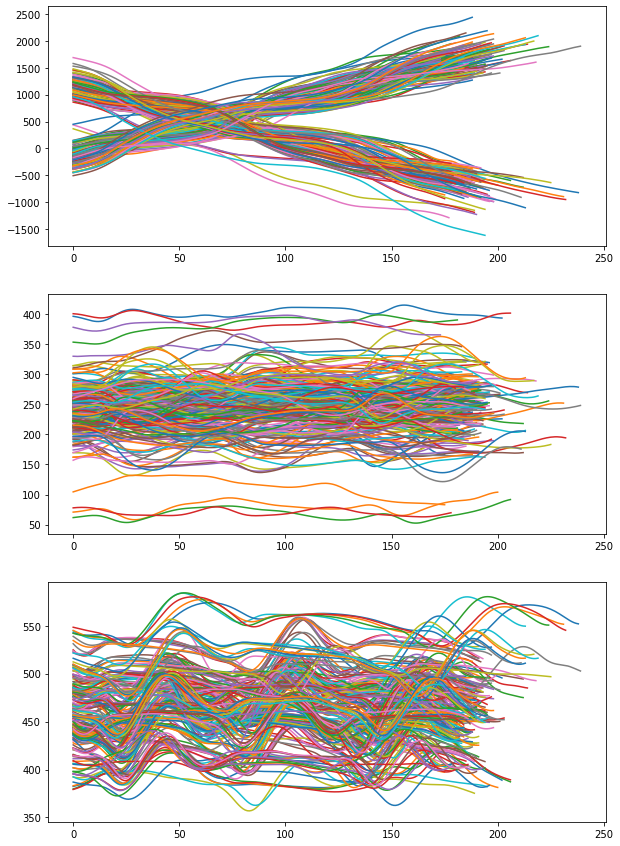

In [5]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_1)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    files_path = os.path.join(path, subject)
    files = os.listdir(files_path)
    for filename in files:
        if not 'C3' in filename:
            continue

        content = c3d(os.path.join(path, subject, filename), extract_forceplat_data=True)
        lfm1x = content['data']['points'][0, 6, :]
        lfm1y = content['data']['points'][1, 6, :]
        lfm1z = content['data']['points'][2, 6, :]

        ax1.plot(lfm1x)
        ax2.plot(lfm1y)
        ax3.plot(lfm1z)

# plt.savefig('../../Figures/dbase1_lfm1.png')
plt.show()

In [ ]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_1)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    files_path = os.path.join(path, subject)
    files = os.listdir(files_path)
    for filename in files:
        if not 'C3' in filename:
            continue

        content = c3d(os.path.join(path, subject, filename), extract_forceplat_data=True)

        x = content['data']['platform'][1]['force'][0, :]
        y = content['data']['platform'][1]['force'][1, :]
        z = content['data']['platform'][1]['force'][2, :]

        ax1.plot(x)
        ax2.plot(y)
        ax3.plot(z)

plt.savefig('../../Figures/dbase1_grf2.png')
plt.show()

In [ ]:
content['data']['platform'][0].keys()

In [ ]:
from scipy.signal import resample

N_SAMPLES = 1024

path = '/home/andromeda/Python/GRF-Synthesis-from-Motion-Trajectories/Dataset/gait-dbase-1/2014001/2014001_C4_05.c3d'

content = c3d(path, extract_forceplat_data=True)

z1 = content['data']['platform'][0]['force'][2, :]
z2 = content['data']['platform'][1]['force'][2, :]
lfccz = content['data']['points'][2, 13, :]
rfccz = content['data']['points'][2, 24, :]

z1 = resample(z1, N_SAMPLES, axis=0)
z2 = resample(z2, N_SAMPLES, axis=0)
lfccz = resample(lfccz, N_SAMPLES, axis=0)
rfccz = resample(rfccz, N_SAMPLES, axis=0)

plt.plot(z1)
# plt.plot(z2)
plt.plot(lfccz)
# plt.plot(rfccz)
plt.show()

In [ ]:
z1.shape

In [ ]:
content['data']['platform'][0]['force'].shape

In [ ]:
z = content['data']['platform'][0]['force'][2, :]
plt.plot(z)

In [ ]:
z = content['data']['platform'][1]['force'][2, :]
plt.plot(z)

In [3]:
from scipy.signal import butter, lfilter

class GrfFilter(object): 
    @staticmethod
    def butter_lowpass(cutoff, fs, order):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def apply(data, cutoff=20, fs=2000, order=2):
        b, a = GrfFilter.butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        y = y - np.median(y)
        return y

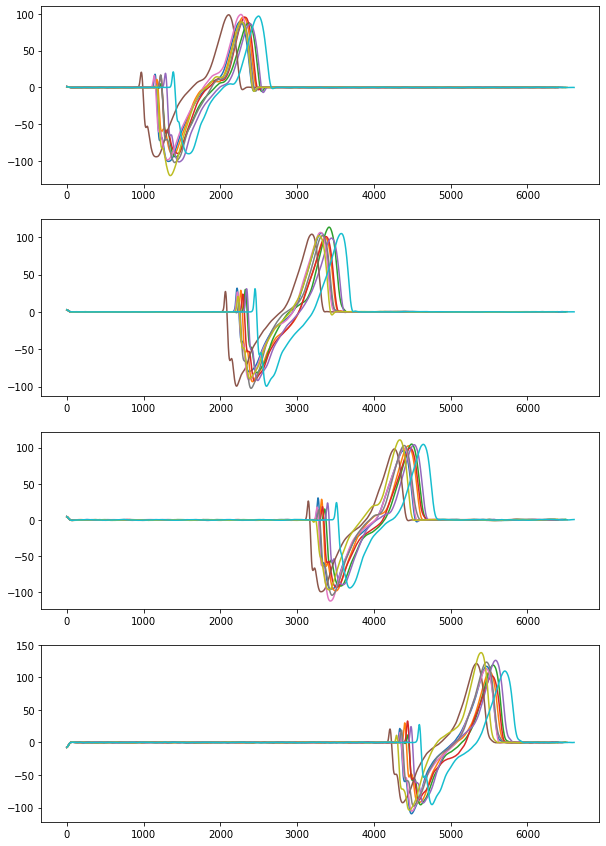

In [13]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 15))

for subject in subjects:
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:
        if not 'V4' in velocity:
            continue

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)

            z1 = content['data']['platform'][1]['force'][1, :]
            z2 = content['data']['platform'][2]['force'][1, :]
            z3 = content['data']['platform'][3]['force'][1, :]
            z4 = content['data']['platform'][4]['force'][1, :]

            z1 = GrfFilter.apply(z1)
            z2 = GrfFilter.apply(z2)
            z3 = GrfFilter.apply(z3)
            z4 = GrfFilter.apply(z4)

            ax1.plot(z1)
            ax2.plot(z2)
            ax3.plot(z3)
            ax4.plot(z4)


        break
    break

# plt.savefig('../../Figures/dbase2_force_y_v4.png')
plt.show()

In [ ]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

for subject in subjects:
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:
        if not 'V35' in velocity:
            continue

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)

            x = content['data']['platform'][4]['force'][0, :]
            y = content['data']['platform'][4]['force'][1, :]
            z = content['data']['platform'][4]['force'][2, :]

            ax1.plot(x)
            ax2.plot(y)
            ax3.plot(z)

plt.savefig('../../Figures/dbase2_grf1.png')
plt.show()

In [ ]:
z = content['data']['platform'][1]['force'][2, :]
plt.plot(z)

In [ ]:
force_y_1 = content['data']['platform'][0]['force'][1, :]
force_y_2 = content['data']['platform'][1]['force'][1, :]
force_y_3 = content['data']['platform'][2]['force'][1, :]
force_y_4 = content['data']['platform'][3]['force'][1, :]
force_y_5 = content['data']['platform'][4]['force'][1, :]
force_y_6 = content['data']['platform'][5]['force'][1, :]

In [ ]:
path = '../../Dataset/gait-dbase-2/Participant14/Raw_Data/V35/T4.c3d'
content = c3d(path, extract_forceplat_data=True)

force_x_1 = content['data']['platform'][0]['force'][0, :]
force_x_2 = content['data']['platform'][1]['force'][0, :]
force_x_3 = content['data']['platform'][2]['force'][0, :]
force_x_4 = content['data']['platform'][3]['force'][0, :]
force_x_5 = content['data']['platform'][4]['force'][0, :]
force_x_6 = content['data']['platform'][5]['force'][0, :]

force_y_1 = content['data']['platform'][0]['force'][1, :]
force_y_2 = content['data']['platform'][1]['force'][1, :]
force_y_3 = content['data']['platform'][2]['force'][1, :]
force_y_4 = content['data']['platform'][3]['force'][1, :]
force_y_5 = content['data']['platform'][4]['force'][1, :]
force_y_6 = content['data']['platform'][5]['force'][1, :]

force_z_1 = content['data']['platform'][0]['force'][2, :]
force_z_2 = content['data']['platform'][1]['force'][2, :]
force_z_3 = content['data']['platform'][2]['force'][2, :]
force_z_4 = content['data']['platform'][3]['force'][2, :]
force_z_5 = content['data']['platform'][4]['force'][2, :]
force_z_6 = content['data']['platform'][5]['force'][2, :]

trajectory_x_l = content['data']['points'][0, 6:11, :]
trajectory_x_r = content['data']['points'][0, 18:23, :]
trajectory_y_l = content['data']['points'][1, 6:11, :]
trajectory_y_r = content['data']['points'][1, 18:23, :]
trajectory_z_r = content['data']['points'][2, 6:11, :]
trajectory_z_l = content['data']['points'][2, 18:23, :]

# clean_grf = GrfFilter.apply(force_z_2)
plt.figure(figsize=(9, 4))
# plt.plot(force_z_1, label='Force plate 1')
plt.plot(force_x_2, label='Right 1')
# plt.plot(force_x_3, label='Left 1')
plt.plot(force_x_4, label='Right 2')
# plt.plot(force_x_5, label='Left 2')
# plt.plot(force_z_6, label='Force plate 6')
# plt.plot(trajectory_x_l.T)

plt.legend()

In [ ]:
plt.figure(figsize=(9, 4))
plt.plot(np.gradient(trajectory_x_l, axis=0).T)

In [ ]:
start = np.min(np.argwhere(mask_force_x_l_1 == True))
                end = np.max(np.argwhere(mask_force_x_l_1 == True)) + swing_period_l
                force_x_l_1 = force_x_3[start : end]

                start = np.min(np.argwhere(mask_force_x_l_2 == True))
                end = np.max(np.argwhere(mask_force_x_l_2 == True)) + swing_period_l
                force_x_l_2 = force_x_5[start : end]

                start = np.min(np.argwhere(mask_force_y_l_1 == True))
                end = np.max(np.argwhere(mask_force_y_l_1 == True)) + swing_period_l
                force_y_l_1 = force_y_3[start : end]

                start = np.min(np.argwhere(mask_force_y_l_2 == True))
                end = np.max(np.argwhere(mask_force_y_l_2 == True)) + swing_period_l
                force_y_l_2 = force_y_5[start : end]

                start = np.min(np.argwhere(mask_force_z_l_1 == True))
                end = np.max(np.argwhere(mask_force_z_l_1 == True)) + swing_period_l
                force_z_l_1 = force_z_3[start : end]

                start = np.min(np.argwhere(mask_force_z_l_2 == True))
                end = np.max(np.argwhere(mask_force_z_l_2 == True)) + swing_period_l
                force_z_l_2 = force_z_5[start : end]